# Analysis of car models

This notebook provides an analysis of the car models within a dataset of 16.2 million registered cars in the Netherlands. The data comes from the Duth authority Dienst Wegverkeer (RDW) and is licensed CC0. Please note that because my initial download got interrupted, I only got 14.6 million of the 16.2 million rows. The data was downloaded on 2023-12-11.

Due to the size of the dataset, standard pandas operations are probably doomed to fail. [This](https://datapythonista.me/blog/pandas-with-hundreds-of-millions-of-rows) blog post explains multiprocessing or the fast PyArrow engine as possible alternatives. For my analysis I rely on a simple streaming approach by using the standard CSV module of Python.

In [6]:
import utils
import matplotlib.pylab as plt

In [30]:
filename = "./open-data-rdw-partial.csv"
allColumns = ["Kenteken","Voertuigsoort","Merk","Handelsbenaming","Vervaldatum APK","Datum tenaamstelling","Bruto BPM","Inrichting","Aantal zitplaatsen","Eerste kleur","Tweede kleur","Aantal cilinders","Cilinderinhoud","Massa ledig voertuig","Toegestane maximum massa voertuig","Massa rijklaar","Maximum massa trekken ongeremd","Maximum trekken massa geremd","Datum eerste toelating","Datum eerste tenaamstelling in Nederland","Wacht op keuren","Catalogusprijs","WAM verzekerd","Maximale constructiesnelheid","Laadvermogen","Oplegger geremd","Aanhangwagen autonoom geremd","Aanhangwagen middenas geremd","Aantal staanplaatsen","Aantal deuren","Aantal wielen","Afstand hart koppeling tot achterzijde voertuig","Afstand voorzijde voertuig tot hart koppeling","Afwijkende maximum snelheid","Lengte","Breedte","Europese voertuigcategorie","Europese voertuigcategorie toevoeging","Europese uitvoeringcategorie toevoeging","Plaats chassisnummer","Technische max. massa voertuig","Type","Type gasinstallatie","Typegoedkeuringsnummer","Variant","Uitvoering","Volgnummer wijziging EU typegoedkeuring","Vermogen massarijklaar","Wielbasis","Export indicator","Openstaande terugroepactie indicator","Vervaldatum tachograaf","Taxi indicator","Maximum massa samenstelling","Aantal rolstoelplaatsen","Maximum ondersteunende snelheid","Jaar laatste registratie tellerstand","Tellerstandoordeel","Code toelichting tellerstandoordeel","Tenaamstellen mogelijk","Vervaldatum APK DT","Datum tenaamstelling DT","Datum eerste toelating DT","Datum eerste tenaamstelling in Nederland DT","Vervaldatum tachograaf DT","Maximum last onder de vooras(sen) (tezamen)/koppeling","Type remsysteem voertuig code","Rupsonderstelconfiguratiecode","Wielbasis voertuig minimum","Wielbasis voertuig maximum","Lengte voertuig minimum","Lengte voertuig maximum","Breedte voertuig minimum","Breedte voertuig maximum","Hoogte voertuig","Hoogte voertuig minimum","Hoogte voertuig maximum","Massa bedrijfsklaar minimaal","Massa bedrijfsklaar maximaal","Technisch toelaatbaar massa koppelpunt","Maximum massa technisch maximaal","Maximum massa technisch minimaal","Subcategorie Nederland","Verticale belasting koppelpunt getrokken voertuig","Zuinigheidsclassificatie","Registratie datum goedkeuring (afschrijvingsmoment BPM)","Registratie datum goedkeuring (afschrijvingsmoment BPM) DT","Gemiddelde Lading Waarde","Aerodynamische voorziening of uitrusting","Additionele massa alternatieve aandrijving","Verlengde cabine indicator","API Gekentekende_voertuigen_assen","API Gekentekende_voertuigen_brandstof","API Gekentekende_voertuigen_carrosserie","API Gekentekende_voertuigen_carrosserie_specifiek","API Gekentekende_voertuigen_voertuigklasse"]

In [31]:
len(allColumns)

96

In [3]:
typeData = utils.countColumnValues(filename, 'Voertuigsoort')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 14650716/14650717 [02:56<00:00, 82856.75it/s]


In [39]:
sortedTypeData = dict(sorted(typeData.items(), key=lambda item: item[1], reverse=True))
sortedTypeData

{'Personenauto': 9110432,
 'Bromfiets': 1400092,
 'Bedrijfsauto': 1345652,
 'Aanhangwagen': 763012,
 'Motorfiets': 753953,
 'Land- of bosbouwtrekker': 347025,
 'Middenasaanhangwagen': 265381,
 'Land- of bosb aanhw of getr uitr stuk': 262275,
 'Oplegger': 212103,
 'Motorrijtuig met beperkte snelheid': 121090,
 'Driewielig motorrijtuig': 34411,
 'Mobiele machine': 14933,
 'Bus': 9016,
 'Autonome aanhangwagen': 6104,
 'Motorfiets met zijspan': 5222}

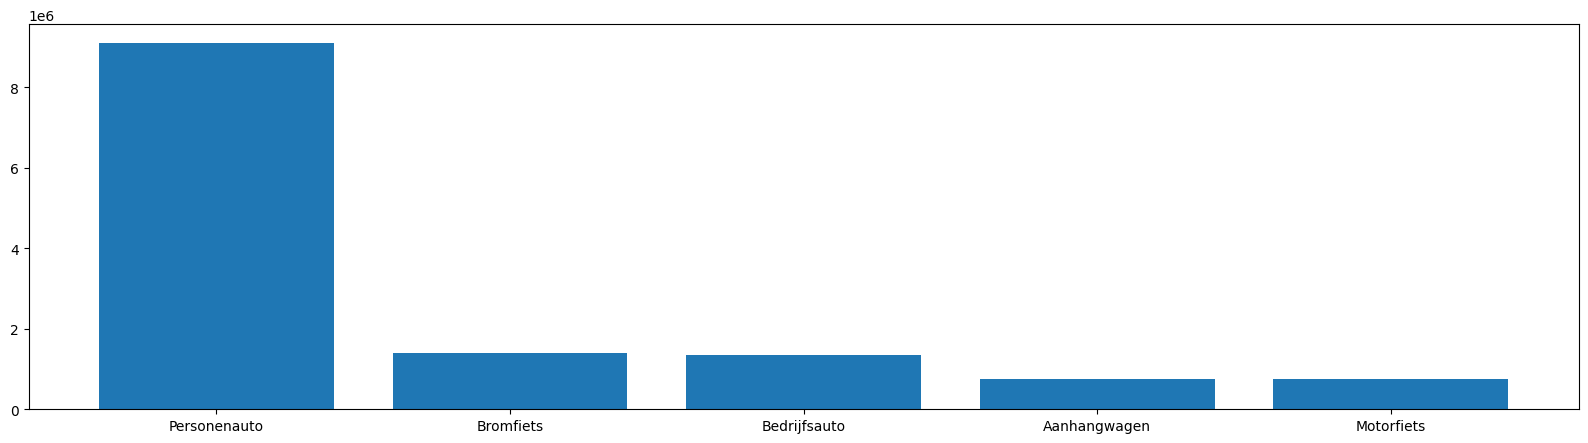

In [42]:
top5Types = {k: sortedTypeData[k] for k in list(sortedTypeData)[:5]}
plt.figure(figsize=(20,5))
plt.bar(*zip(*top5Types.items()))
plt.show()

In [19]:
brandData = utils.countColumnValues(filename, 'Merk')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 14650716/14650717 [03:03<00:00, 79644.32it/s]


In [32]:
len(brandData.keys())

10486

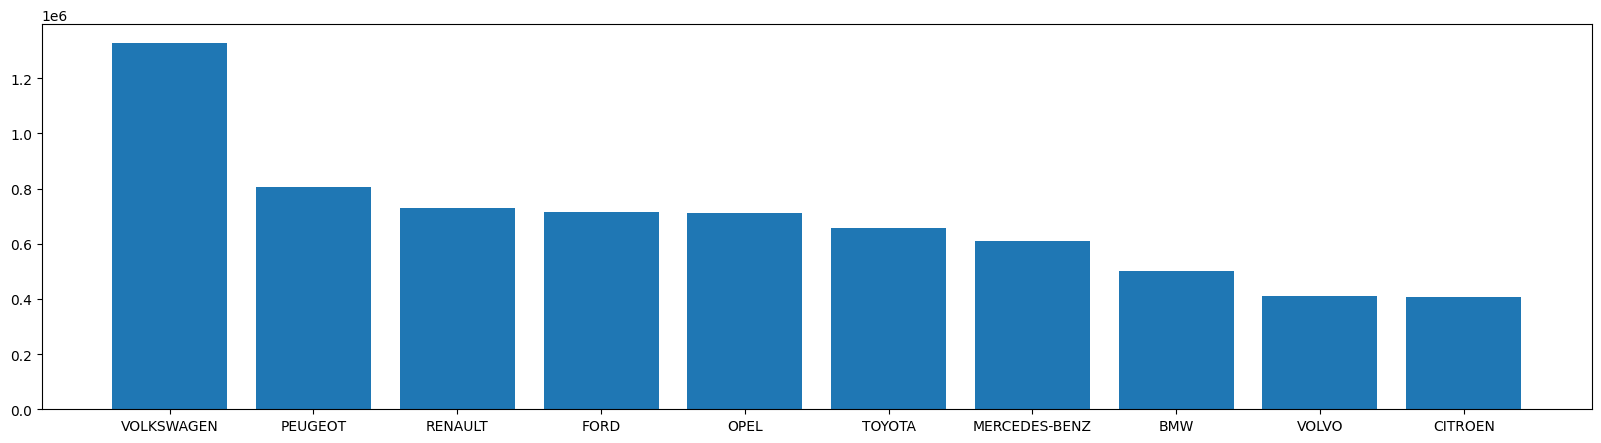

In [40]:
top10Brands = {k: sortedBrandData[k] for k in list(sortedBrandData)[:10]}
plt.figure(figsize=(20,5))
plt.bar(*zip(*top10Brands.items()))
plt.show()

In [33]:
sortedBrandData = dict(sorted(brandData.items(), key=lambda item: item[1], reverse=True))
sortedBrandData

{'VOLKSWAGEN': 1329428,
 'PEUGEOT': 806142,
 'RENAULT': 731409,
 'FORD': 713737,
 'OPEL': 711700,
 'TOYOTA': 658873,
 'MERCEDES-BENZ': 610470,
 'BMW': 502908,
 'VOLVO': 409063,
 'CITROEN': 408078,
 'KIA': 374268,
 'FIAT': 354317,
 'SUZUKI': 341977,
 'AUDI': 339278,
 'HYUNDAI': 294905,
 'HONDA': 260848,
 'NISSAN': 255576,
 'PIAGGIO': 253252,
 'SKODA': 240542,
 'SEAT': 209133,
 'MAZDA': 173521,
 'YAMAHA': 169559,
 'SYM': 142758,
 'MINI': 131829,
 'MITSUBISHI': 128571,
 'HAPERT': 104277,
 'KYMCO': 86102,
 'TESLA': 76593,
 'ANSSEMS': 74977,
 'HOBBY': 74520,
 'KAWASAKI': 72860,
 'TOMOS': 68644,
 'DACIA': 68188,
 'CHEVROLET': 63706,
 'DAF': 58224,
 'HARLEY DAVIDSON': 56306,
 'ZELFBOUW': 53605,
 'LAND ROVER': 53302,
 'FENDT': 52629,
 'PORSCHE': 52038,
 'KRONE': 50848,
 'ALFA ROMEO': 46740,
 'SARIS': 46301,
 'LA SOURIS': 45756,
 'KNAUS': 45031,
 'AGM': 44031,
 'JOHN DEERE': 41208,
 'DAIHATSU': 40851,
 'IVECO': 40439,
 'HENRA': 38656,
 'SCHMITZ CARGOBULL': 32526,
 'SAAB': 30400,
 'BUERSTNER': 2

In [27]:
widthData = utils.countColumnValues(filename, 'Breedte')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 14650716/14650717 [03:40<00:00, 66434.24it/s]


In [29]:
dict(sorted(widthData.items(), key=lambda item: item[1], reverse=True))

{'0': 6572711,
 '': 1381142,
 '180': 412741,
 '181': 341024,
 '175': 254623,
 '184': 247337,
 '179': 239866,
 '255': 238949,
 '185': 227813,
 '190': 212731,
 '186': 192517,
 '183': 186966,
 '173': 185496,
 '178': 176368,
 '177': 165696,
 '182': 162122,
 '176': 144455,
 '187': 143044,
 '162': 124883,
 '230': 123004,
 '160': 116612,
 '174': 114060,
 '192': 100733,
 '196': 99994,
 '210': 92710,
 '188': 89354,
 '170': 82275,
 '199': 78570,
 '193': 76171,
 '168': 75813,
 '220': 74297,
 '164': 70989,
 '67': 66933,
 '189': 66428,
 '172': 65919,
 '203': 63491,
 '163': 61490,
 '250': 59355,
 '200': 58004,
 '205': 56408,
 '202': 49882,
 '166': 49278,
 '207': 47744,
 '69': 47174,
 '260': 43454,
 '74': 42683,
 '169': 41354,
 '191': 38989,
 '206': 38579,
 '165': 37727,
 '167': 33474,
 '232': 32321,
 '204': 32068,
 '209': 29821,
 '194': 29325,
 '208': 28266,
 '197': 26687,
 '229': 25829,
 '68': 24070,
 '217': 23948,
 '219': 23868,
 '171': 22959,
 '221': 20450,
 '201': 20083,
 '198': 18267,
 '254': 1

In [43]:
typeDataPerModel = utils.readColumnData(filename, ['Merk', 'Handelsbenaming'], ['Voertuigsoort'])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 14650716/14650717 [03:55<00:00, 62211.76it/s]


In [44]:
len(typeDataPerModel.keys())

288139

In [45]:
typeDataPerModel

{'RENAULT MASTER 2.8T L1H1 2.5 DCI 100': {'Voertuigsoort': {'Bedrijfsauto': 78,
   'Personenauto': 3}},
 'FORD TRANSIT CONNECT 220L HR VAN 1.8TD 55': {'Voertuigsoort': {'Bedrijfsauto': 345,
   'Personenauto': 4}},
 'VOLKSWAGEN TRANSPORTER BESTEL TDI 96KW 1.0': {'Voertuigsoort': {'Bedrijfsauto': 579,
   'Personenauto': 26}},
 'RENAULT KANGOO 1.5 DCI 80 EURO 2000': {'Voertuigsoort': {'Bedrijfsauto': 297}},
 'VOLVO FH': {'Voertuigsoort': {'Bedrijfsauto': 13940,
   'Motorrijtuig met beperkte snelheid': 13,
   'Land- of bosbouwtrekker': 1}},
 'DAF CF 450 FT': {'Voertuigsoort': {'Bedrijfsauto': 665}},
 'MERCEDES-BENZ ACTROS': {'Voertuigsoort': {'Bedrijfsauto': 10552,
   'Personenauto': 3}},
 'SCANIA S450': {'Voertuigsoort': {'Bedrijfsauto': 1037}},
 'SCANIA R450': {'Voertuigsoort': {'Bedrijfsauto': 4016}},
 'SCANIA G360': {'Voertuigsoort': {'Bedrijfsauto': 88}},
 'OPEL VIVARO 1.9DI 2.9T L2H1': {'Voertuigsoort': {'Bedrijfsauto': 271,
   'Personenauto': 8}},
 'RENAULT TRAFIC 1200 L2H2 1.9 DCI 